In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
car = pd.read_csv('ToyotaCorolla.csv')
car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


Considering only the below columns and preparing a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [4]:
columns = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]

car2 = car[columns]
car2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
car2.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [6]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
car3=car2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
car3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
car3[car3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
car3.drop_duplicates(inplace=True)
car3.reset_index(drop=True, inplace=True)

In [10]:
car3.shape

(1435, 9)

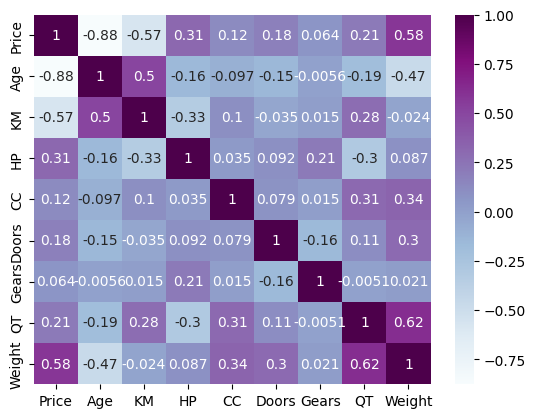

In [11]:
corr = car3.corr()

sns.heatmap(corr, cmap='BuPu',annot=True)
plt.show()

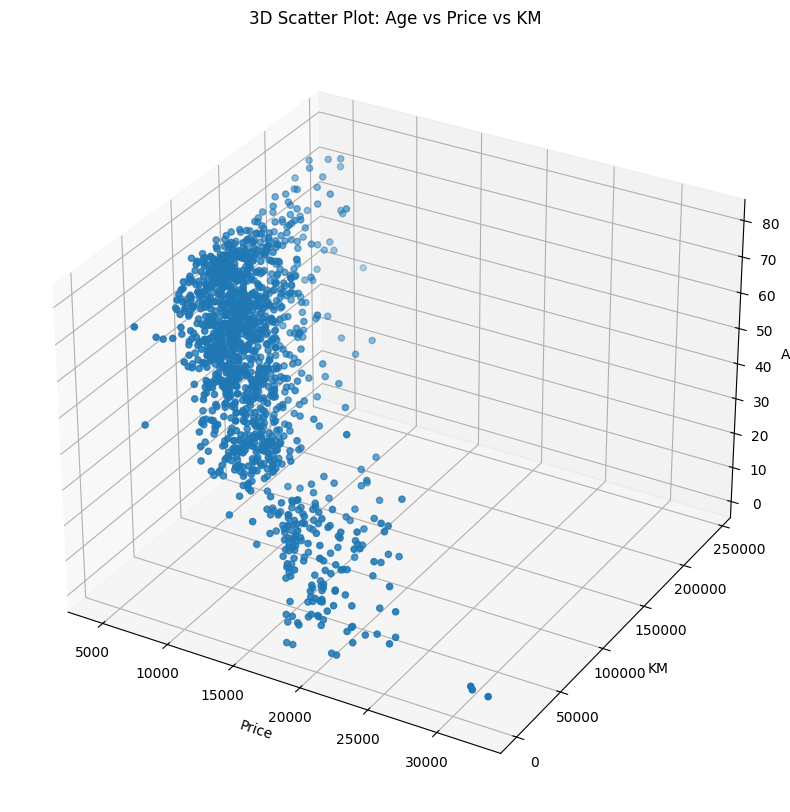

In [12]:
fig = plt.figure(figsize=(12,10))
ax= fig.add_subplot(111, projection= '3d')

ax.scatter(car3['Price'],car3['KM'], car3['Age'])
ax.set_xlabel('Price')
ax.set_ylabel('KM')
ax.set_zlabel('Age')
ax.set_title('3D Scatter Plot: Age vs Price vs KM')
plt.show()

Scaling the data

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(car3)
car4 = pd.DataFrame(scaled_data, columns = car3.columns)
car4


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.034396,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


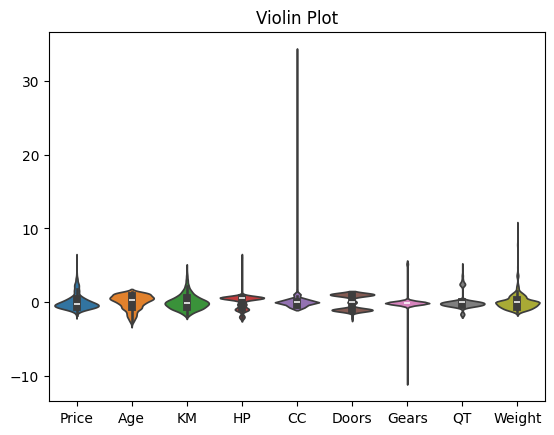

In [14]:
sns.violinplot(data = car4)
plt.title('Violin Plot')
plt.show()

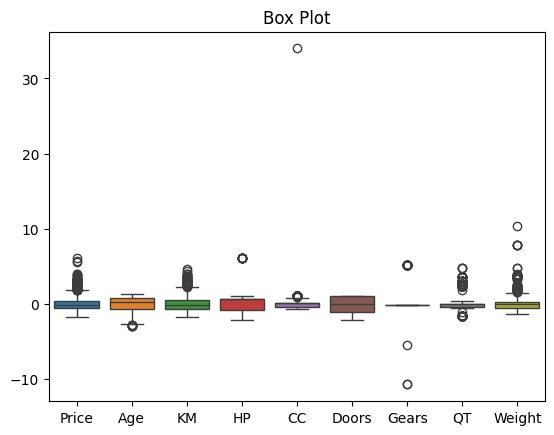

In [15]:
sns.boxplot(data = car4)
plt.title('Box Plot')
plt.show()

Model Building

In [16]:
X = car3.drop('Price',axis= 1)
Y = car3['Price']

In [17]:
model = sm.OLS(Y,X).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Sun, 28 Jan 2024   Prob (F-statistic):                        0.00
Time:                        09:52:45   Log-Likelihood:                         -12374.
No. Observations:                1435   AIC:                                  2.476e+04
Df Residuals:                    1427   BIC:                                  2.481e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -125.4366      2.444    -51.332      0.000    -130.230    -120.643
KM            -0.0204      0.001    -16.239      0.000      -0.023      -0.018
HP            33.3304      2.795     11.925      0.000      27.848      38.813
CC            -0.1007      0.090     -1.114      0.265      -0.278       0.077
Doors         -6.3603     40.159     -0.158      0.874     -85.138      72.417
Gears         92.5332    148.382      0.624      0.533    -198.537     383.604
QT             5.6875      1.229      4.629      0.000       3.277       8.098
Weight        13.9761      0.773     18.081      0.000      12.460      15.492
==============================================================================
Omnibus:                      109.540   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.984
Skew:                           0.030   Prob(JB):                    6.24e-125
Kurtosis:                       6.092   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
vif_dict = {}

for column in  X.columns:
    formula = f"{column} ~ " + "+".join([col for col in X.columns if col != column])
    rsquared = smf.ols(formula, data=car4).fit().rsquared
    vif = 1 / (1 - rsquared)
    vif_dict[column] = vif

for variable, vif_value in vif_dict.items():
    print(f"VIF for {variable}: {vif_value}")

VIF for Age: 1.8762358497682896
VIF for KM: 1.75717802398104
VIF for HP: 1.419180108718214
VIF for CC: 1.1634703645940845
VIF for Doors: 1.1558898658142065
VIF for Gears: 1.0988429081631146
VIF for QT: 2.295374508985715
VIF for Weight: 2.4871800071791843


it can be concluded that VIF is less

In [20]:
new_data=pd.DataFrame({'Age':55 , 'KM':68533, 'HP':100,'CC':1600,'Doors':4,'Gears':5, 'QT': 100,'Weight':1100},index=[1])

In [25]:
print(f'Predicted Price:\n{model.predict(new_data)}')

Predicted Price:
1    11254.948238
dtype: float64
